In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Читання та перегляд набору даних

In [4]:
ds = pd.read_csv("../data/dataset.csv")
ds.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Data engineering 

Missing data imputation

In [5]:
# створимо функцію для заповнення відсутніх значень:
def impute_na(df, variable, value):
    return df[variable].fillna(value)

In [6]:
# Знаходження медіани для стовпця
median_arrival_delay = ds['Arrival Delay in Minutes'].median()

In [7]:
# Заміна пропущених значень на медіану
ds['Arrival Delay in Minutes'] = impute_na(ds, 'Arrival Delay in Minutes', median_arrival_delay)

In [8]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col, ds[col].isnull().sum())
    else:
        print("There aren't missing data")

There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data
There aren't missing data


## Categorical encoding

In [9]:
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

In [10]:
ds.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [11]:
#categorics
ds[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


Label encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ds["Gender"] = le.fit_transform(ds["Gender"])
ds["Customer Type"] = le.fit_transform(ds["Customer Type"])
ds["Type of Travel"] = le.fit_transform(ds["Type of Travel"])
ds["Class"] = le.fit_transform(ds["Class"])
ds["satisfaction"] = le.fit_transform(ds["satisfaction"])

## Outlier Engineering

In [13]:
from sklearn.neighbors import LocalOutlierFactor

numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Ініціалізація моделі LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.05)  # Встановіть contamination залежно від розміру викидів, які ви очікуєте

# Обчислення оцінки аномалій (викидів) для кожного прикладу в датасеті
outlier_scores = lof.fit_predict(ds[numerical_columns])

# Відображення кількості викидів
outlier_count = len(ds[outlier_scores == -1])
print("Number of outliers:", outlier_count)

# Видалення рядків, що містять викиди
ds = ds[outlier_scores != -1]

# Відображення оновленого датасету без викидів
print(f"Dataset without outliers:{len(ds)}")

Number of outliers: 6494
Dataset without outliers:123386


In [14]:
ds.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


# Modelling and Validation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

Define target and features columns

In [16]:
y_column = 'satisfaction' # target variable
X_columns = [
    "Gender", "Customer Type", "Age", "Type of Travel", "Class",
    "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink",
    "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness",
    "Departure Delay in Minutes", "Arrival Delay in Minutes"
]
X = ds[X_columns]
y = ds[y_column]

Train test set split

Оптимальний метод поділу даних на навчальну та тестову вибірки - це випадковий поділ, що дозволяє зберегти випадковий розподіл даних. Випадковий поділ забезпечує випадковий розподіл зразків між навчальною та тестовою вибірками, що допомагає уникнути впливу будь-якого потенційного порядку або закономірності в даних.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#Model building
lr = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
gnb = GaussianNB()
sgd = SGDClassifier()
dt = DecisionTreeClassifier()

## Model metrics

Accuracy (Точність): Ця метрика вимірює відношення правильно класифікованих зразків до загальної кількості зразків. Це може бути корисною метрикою, якщо у вас є високий баланс між класами (тобто, обидва класи представлені відносно рівномірно). Однак, вона може бути непоказниковою, якщо у вас незбалансовані класи. 
F1-score: Це гармонічне середнє між precision та recall і використовується для оцінки збалансованості між цими двома метриками. F1-score корисна, коли вам потрібно знайти баланс між точністю та чутливістю. 
ROC-AUC: область під кривою характеристики роботи приймача (Receiver Operating Characteristic, ROC) вимірює здатність моделі відокремлювати позитивні та негативні класи. Вона дозволяє оцінити загальну ефективність моделі безпосередньо на кривій ROC.

In [19]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [20]:
def creport(model):
    ypred = model.predict(X_test)
    return metrics.classification_report(y_test, ypred)

In [21]:
random_forest = rf
random_forest.fit(X_train,y_train)
print(creport(random_forest))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     20936
           1       0.97      0.94      0.96     16080

    accuracy                           0.96     37016
   macro avg       0.96      0.96      0.96     37016
weighted avg       0.96      0.96      0.96     37016



In [22]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     20936
           1       0.72      0.67      0.70     16080

    accuracy                           0.75     37016
   macro avg       0.74      0.74      0.74     37016
weighted avg       0.75      0.75      0.75     37016



In [23]:
logistic_regression = lr
logistic_regression.fit(X_train,y_train)
print(creport(logistic_regression))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     20936
           1       0.87      0.84      0.85     16080

    accuracy                           0.88     37016
   macro avg       0.87      0.87      0.87     37016
weighted avg       0.88      0.88      0.88     37016



In [24]:
gb_classification = gb
gb_classification.fit(X_train,y_train)
print(creport(gb_classification))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     20936
           1       0.94      0.92      0.93     16080

    accuracy                           0.94     37016
   macro avg       0.94      0.94      0.94     37016
weighted avg       0.94      0.94      0.94     37016



In [25]:
gnb_classification = gnb
gnb_classification.fit(X_train,y_train)
print(creport(gnb_classification))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     20936
           1       0.86      0.82      0.84     16080

    accuracy                           0.87     37016
   macro avg       0.87      0.86      0.86     37016
weighted avg       0.87      0.87      0.87     37016



In [26]:
sgd_classification = sgd
sgd_classification.fit(X_train,y_train)
print(creport(sgd_classification))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     20936
           1       0.85      0.78      0.81     16080

    accuracy                           0.84     37016
   macro avg       0.85      0.84      0.84     37016
weighted avg       0.84      0.84      0.84     37016



In [27]:
dt_classification = dt
dt_classification.fit(X_train,y_train)
print(creport(dt_classification))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20936
           1       0.93      0.94      0.94     16080

    accuracy                           0.94     37016
   macro avg       0.94      0.94      0.94     37016
weighted avg       0.94      0.94      0.94     37016



## Model evaluation

In [28]:
y_train_pred_rf = random_forest.predict(X_train)
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_lr = logistic_regression.predict(X_train)
y_train_pred_gb = gb_classification.predict(X_train)
y_train_pred_gnb = gnb_classification.predict(X_train)
y_train_pred_sgd = sgd_classification.predict(X_train)
y_train_pred_dt = dt_classification.predict(X_train)

In [29]:
y_test_pred_rf = random_forest.predict(X_test)
y_test_pred_knn = KNN.predict(X_test)
y_test_pred_lr = logistic_regression.predict(X_test)
y_test_pred_gb = gb_classification.predict(X_test)
y_test_pred_gnb = gnb_classification.predict(X_test)
y_test_pred_sgd = sgd_classification.predict(X_test)
y_test_pred_dt = dt_classification.predict(X_test)

In [30]:
all_evaluate = pd.DataFrame({'Model':['Random Forest', 'KNN', 'Logistic Regression', "GradientBoostingClassifier", "GaussianNB", "SGDClassifier", "DecisionTreeClassifier"],
                             
'Train Accuracy':[accuracy_score(y_train,y_train_pred_rf), accuracy_score(y_train,y_train_pred_knn), accuracy_score(y_train,y_train_pred_lr), accuracy_score(y_train,y_train_pred_gb), 
                  accuracy_score(y_train,y_train_pred_gnb), accuracy_score(y_train,y_train_pred_sgd), accuracy_score(y_train,y_train_pred_dt)],
                             
'Test Accuracy':[accuracy_score(y_test,y_test_pred_rf), accuracy_score(y_test,y_test_pred_knn), accuracy_score(y_test,y_test_pred_lr),
                 accuracy_score(y_test,y_test_pred_gb), 
                 accuracy_score(y_test,y_test_pred_gnb), accuracy_score(y_test,y_test_pred_sgd), accuracy_score(y_test,y_test_pred_dt)],
                             
'f1-score':[f1_score(y_test,y_test_pred_rf), f1_score(y_test,y_test_pred_knn), f1_score(y_test,y_test_pred_lr),
            f1_score(y_test,y_test_pred_gb),
            f1_score(y_test,y_test_pred_gnb), f1_score(y_test,y_test_pred_sgd), f1_score(y_test,y_test_pred_dt)]}
)

print(all_evaluate)

                        Model  Train Accuracy  Test Accuracy  f1-score
0               Random Forest        1.000000       0.962530  0.956214
1                         KNN        0.829895       0.747109  0.698625
2         Logistic Regression        0.874505       0.875837  0.854823
3  GradientBoostingClassifier        0.942376       0.942457  0.933132
4                  GaussianNB        0.864478       0.866544  0.842915
5               SGDClassifier        0.840465       0.843797  0.811894
6      DecisionTreeClassifier        1.000000       0.944456  0.936248


модель Random Forest Classifier проявила найвищу точність на тестовому наборі даних (Test Accuracy - 0.963). Також важливо враховувати високе значення F1 (0.956), що свідчить про добру здатність моделі до класифікації обох класів.

In [31]:
model_list = [rf, knn, lr, gb, gnb, sgd, dt]
accuracy_list = []
f1_list = []
roc_auc_list = []
for i in model_list:
    i_model = i.fit(X_train,y_train)
    y_pred = i_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

In [32]:
models = ['Random Forest', 'KNN', 'Logistic Regression', "GradientBoostingClassifier", "GaussianNB", "SGDClassifier", "DecisionTreeClassifier"]

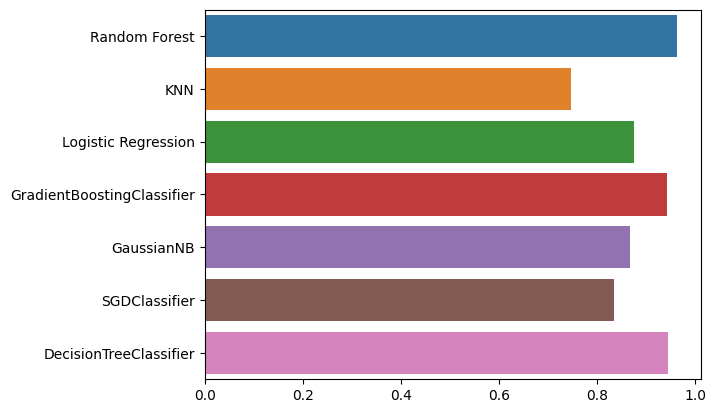

In [33]:
# visualizing the models accuracy score
sns.barplot(y=models, x=accuracy_list)
plt.show()

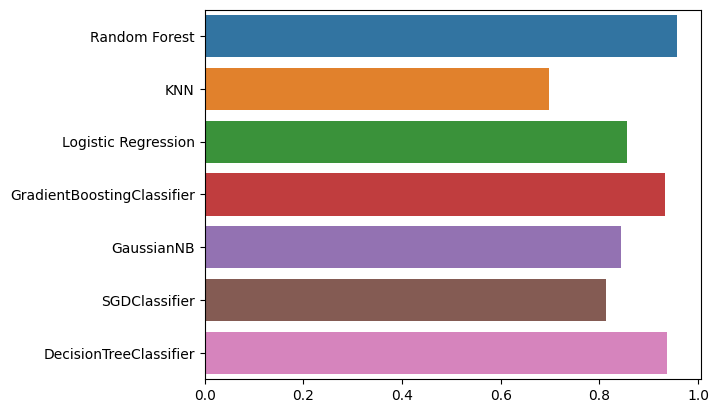

In [34]:
# visualizing the models f1 score
sns.barplot(y=models, x=f1_list)
plt.show()

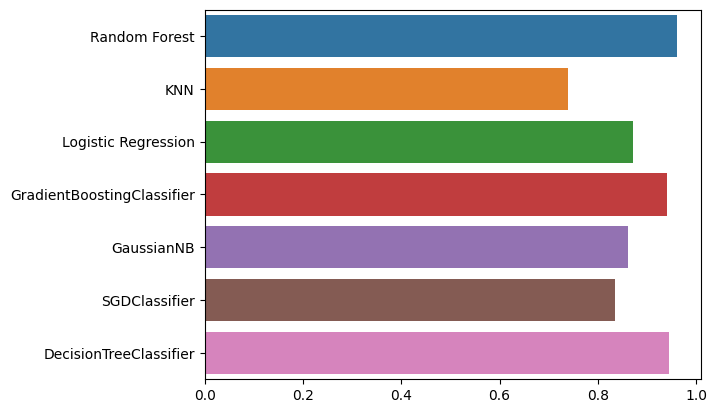

In [35]:
# visualizing the models roc-auc score
sns.barplot(y=models, x=roc_auc_list)
plt.show()

Модель "Random Forest" показала найвищі результати з f1-score, accuracy_score та roc_auc_score.

In [36]:
def confusion_matrix_plot(model):
    ypred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,
    linewidths = 0.1, annot_kws = {'size':20})
    plt.title('Confusion Matrix', fontsize = 15)

In [37]:
def roc_auc_plot(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\1553902627.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\1553902627.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


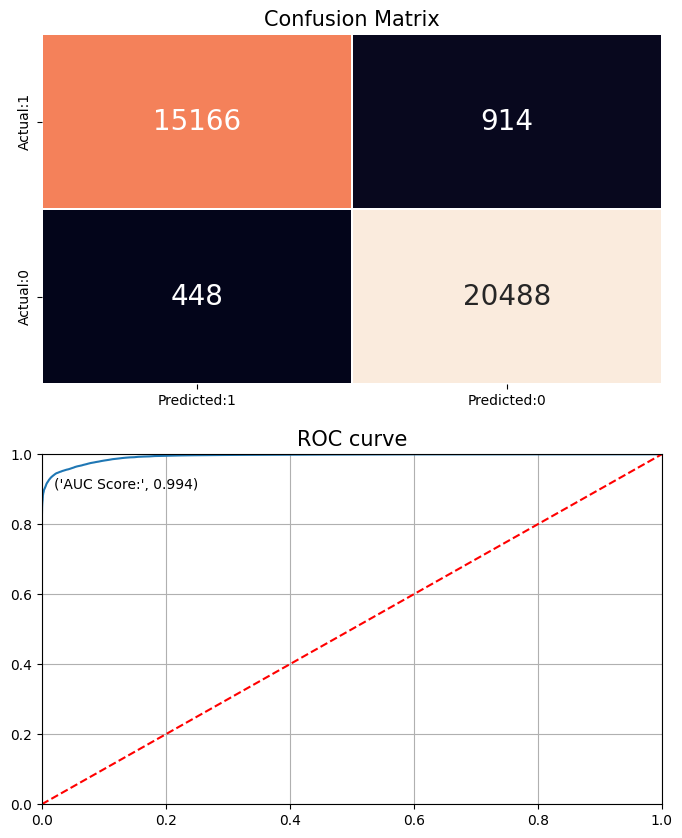

In [38]:
#Random Forest
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(rf)
plt.subplot(2, 1, 2)
roc_auc_plot(rf)

C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\1619882482.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\1619882482.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


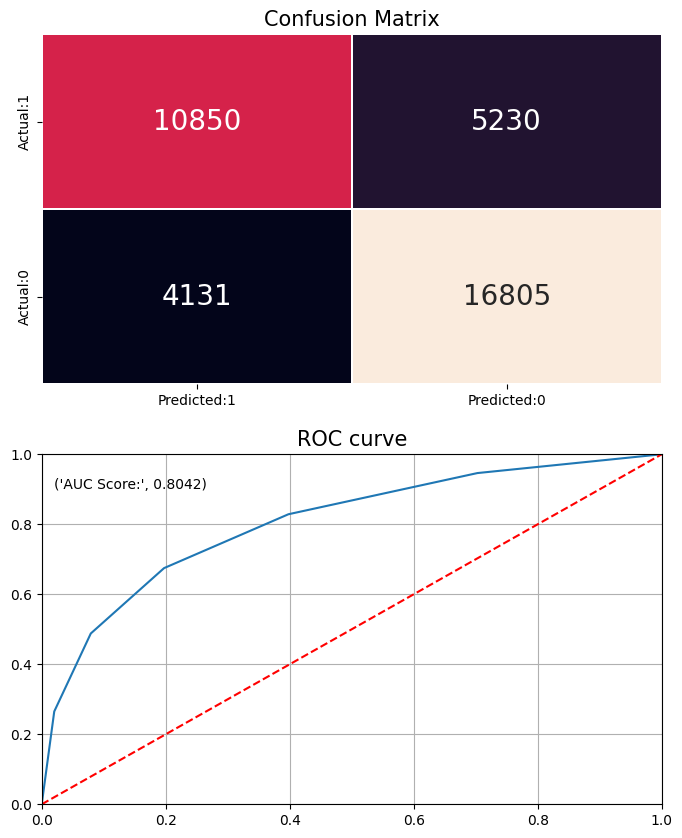

In [39]:
#KNN
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(knn)
plt.subplot(2, 1, 2)
roc_auc_plot(knn)

C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\561323666.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\561323666.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


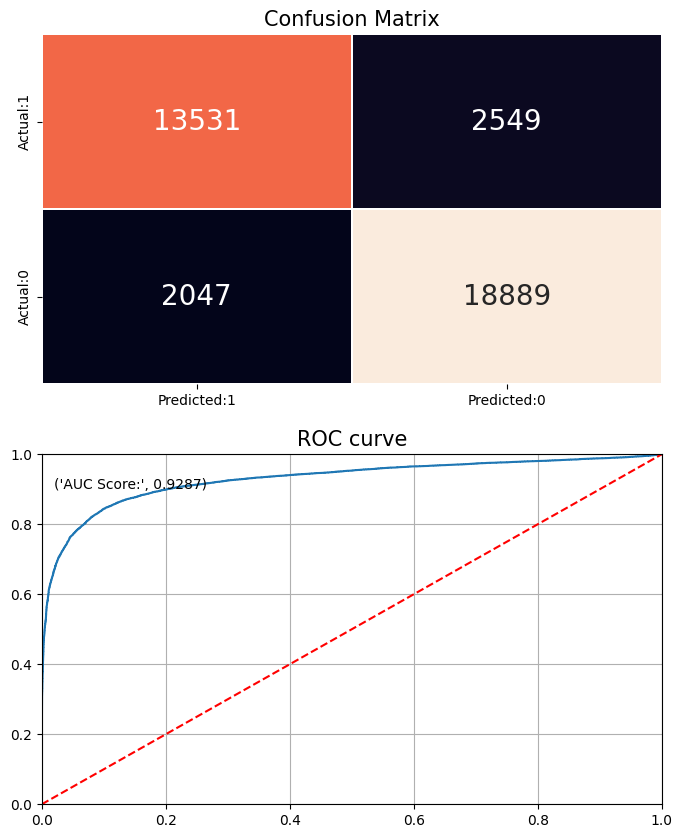

In [40]:
#Logistic Regression
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(lr)
plt.subplot(2, 1, 2)
roc_auc_plot(lr)
plt.show()

C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\715284833.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\715284833.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


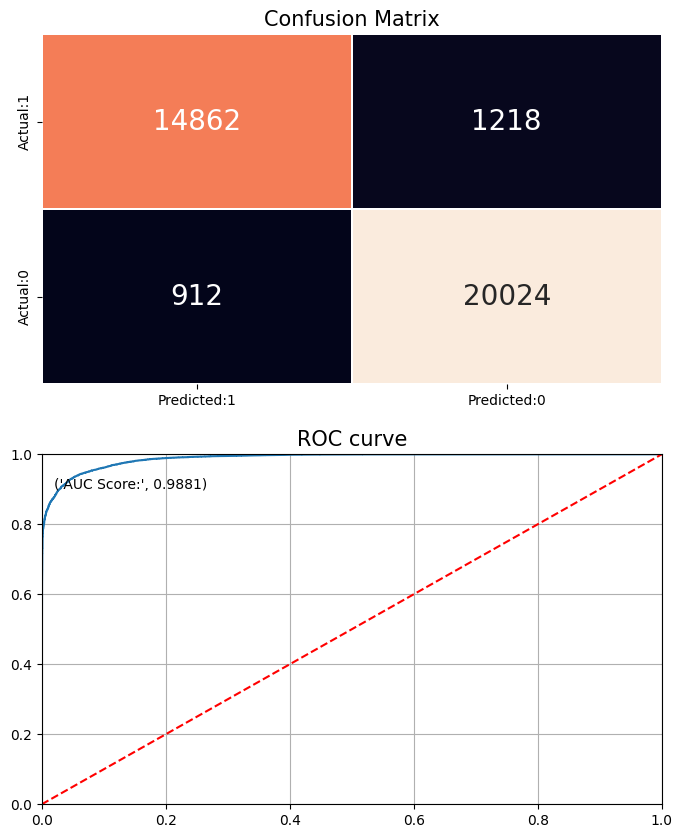

In [41]:
#GradientBoosting
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(gb)
plt.subplot(2, 1, 2)
roc_auc_plot(gb)
plt.show()

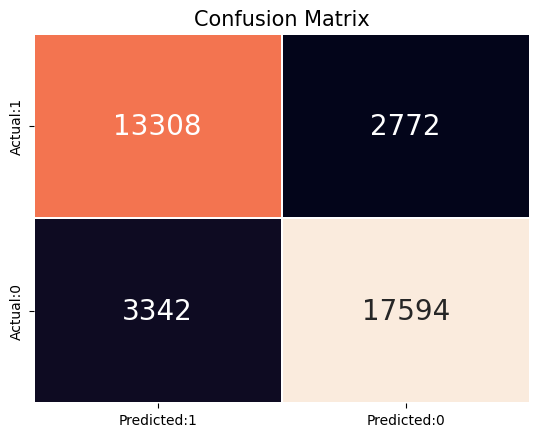

In [42]:
#SGDClassifier
# fig, axs = plt.subplots(2, 2, figsize=(8, 10))
# plt.subplot(2, 1, 1)
confusion_matrix_plot(sgd)
# plt.subplot(2, 1, 2)
# roc_auc_plot(sgd)
plt.show()

C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\91862065.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\91862065.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


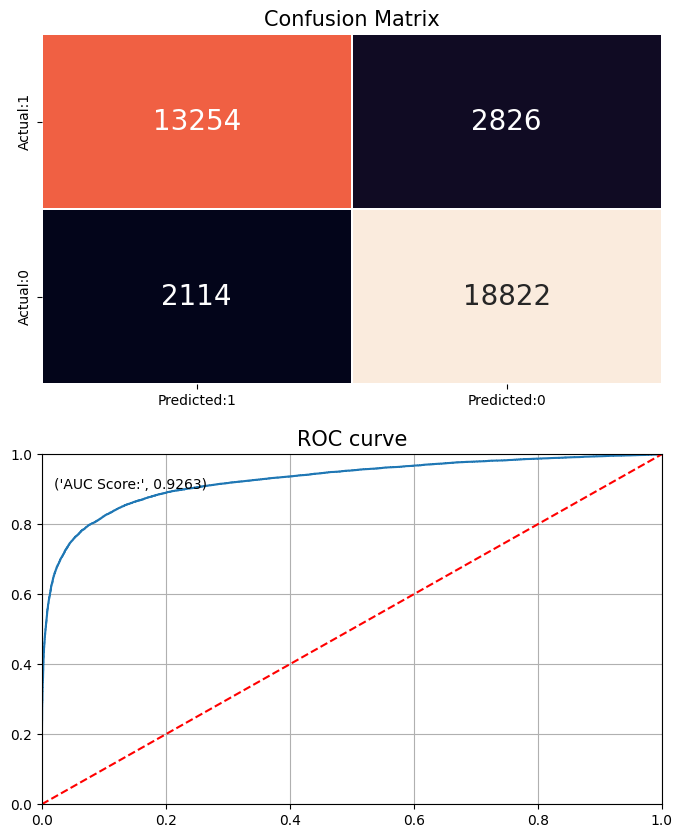

In [43]:
#GaussianNB
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(gnb)
plt.subplot(2, 1, 2)
roc_auc_plot(gnb)
plt.show()

C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\2034261373.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
C:\Users\Макс\AppData\Local\Temp\ipykernel_11408\2034261373.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


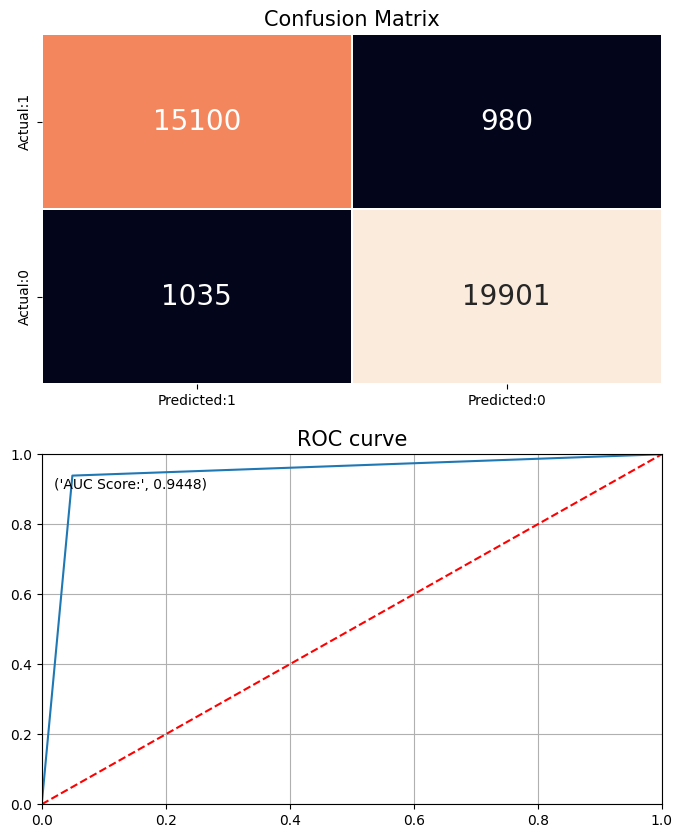

In [44]:
#DecisionTreeClassifier
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(dt)
plt.subplot(2, 1, 2)
roc_auc_plot(dt)
plt.show()

Проаналізувавши результати можна зробити висновок, що найкраща модель - RandomForest